# DIFI Validation

The following is a validation of the Dynamic Identity Fusion Index [1], a measure of a person's relationship to a target group (`$TARGET_GROUP`). For each of eight target groups, 250 people in the United States were instructed:

> The diagram below is designed to represent your relationship with `$TARGET_GROUP`. Please indicate your relationship by clicking and dragging the smaller "Me" circle to the position that best captures your relationship with `$TARGET_GROUP`.

Here is a sample DIFI user interface for the target group `USA`.

![difi](https://raw.githubusercontent.com/Dallinger/identityfusion/master/demo.gif)

[1] Jimenez, J., Gomez, A., Buhrmester, M. D., Vázquez, A., 
Whitehouse, H., & Swann, W. B. (2016). The dynamic identity fusion 
index: A new continuous measure of identity fusion for web-based 
questionnaires. *Social Science Computer Review*, 34(2), 215-228.

We begin by importing numerical processing and plotting tools:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Next we define a function that plots a histogram of DIFI scores, with a vertical line at the median score.

In [4]:
import os 

def plot(f):
    data = pd.read_csv(os.path.join("data", f))
    difi_scores = data["Overlap"].values[~np.isnan(data["Overlap"].values)]
    plt.hist(difi_scores, bins=20, color="#000000", ec='#FFFFFF')
    plt.axes().set_aspect(0.40)
    plt.axes().spines['right'].set_visible(False)
    plt.axes().spines['top'].set_visible(False)
    plt.ylim([0, 125])
    plt.title(f, loc='left')
    plt.xlabel("DIFI score")
    plt.ylabel("Frequency")
    plt.axvline(np.median(difi_scores), color='grey', linewidth=2)
    plt.show()

## Target groups

The eight target groups were:

1. The group to which the participant feels the strongest association (`difi_strongest.csv`).
2. A group of which the participant is not a member.
3. A group of which the participant is not a member, but to which they feel a strong association.
4. Players with the same avatar color. (Made after assignment of a coloful avatar picked from 3 colors, in minimal-group style.)
5. Players with a different avatar color. (Made after assignment of a coloful avatar picked from 3 colors, in minimal-group style.) 
6. The USA
7. Kittens. (To test a group to which the participant could not possibly belong.)
8. Colorless green ideas that sleep furiously. (To test a group that could not possibly even exist.)


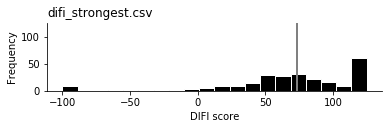

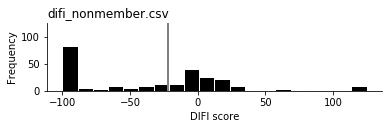

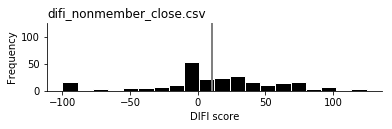

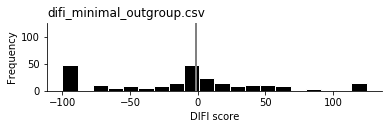

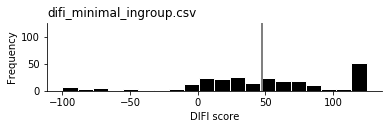

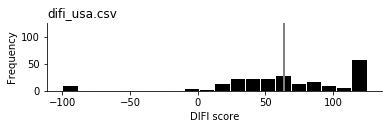

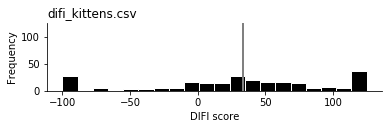

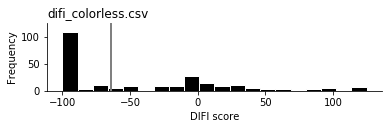

In [5]:
plot("difi_strongest.csv")
plot("difi_nonmember.csv")
plot("difi_nonmember_close.csv")
plot("difi_minimal_outgroup.csv")
plot("difi_minimal_ingroup.csv")
plot("difi_usa.csv")
plot("difi_kittens.csv")
plot("difi_colorless.csv")